<a href="https://colab.research.google.com/github/muhammadahsan2023/Capstone_Project/blob/main/Forecasting_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
from statsmodels.tsa.arima.model import ARIMA
import math

## Mounting Google Drive in a Google Colab notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading Excel file using Pandas from a specific path from Google Drive

In [3]:
df0 = pd.read_excel('/content/drive/MyDrive/Data/online_retail_II.xlsx')

In [4]:
#Second data was on sheet 1
df1 = pd.read_excel('/content/drive/MyDrive/Data/online_retail_II.xlsx', sheet_name=1)

In [41]:
#Concatenating two DataFrames
retail_data = pd.concat([df0, df1], ignore_index=True)

In [42]:
df=retail_data

In [43]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [44]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [46]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [47]:
df.shape

(1067371, 8)

In [48]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [49]:
for i in df.columns:
  print(i," ",df[i].unique())

Invoice   [489434 489435 489436 ... 581585 581586 581587]
StockCode   [85048 '79323P' '79323W' ... 23609 23617 23843]
Description   ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'mixed up'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Quantity   [    12     48     24 ...    698  80995 -80995]
InvoiceDate   ['2009-12-01T07:45:00.000000000' '2009-12-01T07:46:00.000000000'
 '2009-12-01T09:06:00.000000000' ... '2011-12-09T12:31:00.000000000'
 '2011-12-09T12:49:00.000000000' '2011-12-09T12:50:00.000000000']
Price   [   6.95    6.75    2.1  ...  933.17 1714.17  224.69]
Customer ID   [13085. 13078. 15362. ... 15520. 13298. 12713.]
Country   ['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 'Bahra

In [50]:
uniq_products = df['Description'].unique()

In [51]:
df['Description'].nunique()

5698

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [53]:
# let clean the string of the description to understand the names of the products easily
df['Description'] = df['Description'].str.replace('.','').str.upper().str.strip()
df['Description'] = df['Description'].replace('\s+',' ',regex=True)

<ipython-input-53-2f90e322d077>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Description'] = df['Description'].str.replace('.','').str.upper().str.strip()


In [54]:
df['StockCode'].nunique()

5305

In [55]:
# Converting 'StockCode' column to uppercase and then to string type
df['StockCode'] = df['StockCode'].str.upper()
df['StockCode'] = df['StockCode'].astype(str)

In [56]:
df['StockCode'].isna().sum()

0

In [57]:
# finding the unusual StockCodes
Stock = df['StockCode'].unique()
Stock.sort()
unusual_codes = Stock[::-1][:]

print(' total unusual / Irrelevant stock codes are : ', len(unusual_codes))
print('Irrelevant stock codes: \n', unusual_codes)


 total unusual / Irrelevant stock codes are :  1543
Irrelevant stock codes: 
 ['nan' 'TEST002' 'TEST001' ... '10123G' '10123C' '10002R']


In [58]:
# Check if each StockCode contains at least one digit
CodeTypes = [any(char.isdigit() for char in code) for code in df['StockCode']]

In [59]:
if "False" in CodeTypes:
  print('there are irrevlevent stock codes')
else:
  print('there are no irrevlevent values')

there are no irrevlevent values


In [60]:
# Find the indices of StockCodes that contain only strings
Irrelevantstockindices = [i for i, v in enumerate(CodeTypes) if v == False]

In [61]:
len(Irrelevantstockindices)

937964

In [62]:
# REMOVING ROWS WITH IRRELEVANT STOCKCODES
df.drop(Irrelevantstockindices, inplace=True)

In [63]:
df.shape

(129407, 8)

In [75]:
# removing outlier from Price and Quantity column by using z-score method
data = df[(np.abs(sp.stats.zscore(df['Price'])) < 3) & (np.abs(sp.stats.zscore(df['Quantity'])) < 5)]

In [76]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067239,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany
1067270,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
1067302,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom
1067308,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom


 **Data Cleaning**

In [77]:
filt = (data.Invoice.str.contains('C') == True)
data['Invoice'][filt]

179        C489449
185        C489449
196        C489459
197        C489459
198        C489459
            ...   
1062374    C581228
1062377    C581229
1062379    C581229
1063076    C581330
1064027    C581409
Name: Invoice, Length: 2178, dtype: object

In [78]:
unique_invoices = data['Invoice'].unique()

In [ ]:
for item in unique_invoices:
  print(item)

In [80]:
if (data['Quantity'] < 0).any():
    print("Column 'quantity' has negative values.")
else:
    print("Column 'Quantity' does not have negative values")

Column 'quantity' has negative values.


In [81]:
# Drop rows where Invoice number is positive and contains 'C'
filt = (data.Invoice.str.contains('C') == True)
data.drop(data[filt].index, inplace=True)

<ipython-input-81-716db9cef8cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[filt].index, inplace=True)


In [88]:
data['Invoice'] = data['Invoice'].astype(str)

<ipython-input-88-84c7f6ed0c6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Invoice'] = data['Invoice'].astype(str)


In [89]:
# drop  INCORRECT VALUES

# Drop rows where Quantity is positive and Invoice contains 'C'
filt1 = (data.Quantity > 0) & (data.Invoice.str.contains('C') == True)
data.drop(data[filt1].index, inplace=True)

# Drop rows where Quantity is negative and Invoice does not contain 'C'
filt2 = (data.Quantity < 0) & (data.Invoice.str.contains('C') == False)
data.drop(data[filt].index, inplace=True)


<ipython-input-89-3145b1f18f54>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[filt1].index, inplace=True)
<ipython-input-89-3145b1f18f54>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.drop(data[filt].index, inplace=True)
<ipython-input-89-3145b1f18f54>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[filt].index, inplace=True)


In [90]:
data.head(50)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
29,489436,84596L,BISCUITS SMALL BOWL LIGHT BLUE,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
42,489437,84507B,STRIPES DESIGN MONKEY DOLL,6,2009-12-01 09:08:00,2.55,15362.0,United Kingdom
46,489437,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,2009-12-01 09:08:00,0.85,15362.0,United Kingdom
61,489438,84031A,CHARLIE+LOLA RED HOT WATER BOTTLE,56,2009-12-01 09:24:00,3.00,18102.0,United Kingdom
62,489438,84031B,CHARLIE LOLA BLUE HOT WATER BOTTLE,56,2009-12-01 09:24:00,3.00,18102.0,United Kingdom


In [91]:
# Drop rows where Description contains '?'
data.drop(data[data.Description.str.contains('?', regex=False) == True].index, inplace=True)

<ipython-input-91-be1803a0e51a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.Description.str.contains('?', regex=False) == True].index, inplace=True)


In [92]:
# Drop rows where Price is equal to 0
data.drop(data[data.Price == 0].index, inplace=True)

<ipython-input-92-54aab8415913>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.Price == 0].index, inplace=True)


In [93]:
# Fill missing Description values based on StockCode
for index, value in data.StockCode[data.Description.isna() == True].items():
    if pd.notna(data.Description[data.StockCode == value]).sum() != 0:
        data.Description[index] = data.Description[data.StockCode == value].mode()[0]
    else:
        data.drop(index=index, inplace=True)

In [94]:
# Convert 'Description' column to string type
data['Description'] = data['Description'].astype(str)

<ipython-input-94-384809b56a0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'] = data['Description'].astype(str)


In [95]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067239,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany
1067270,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
1067302,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom
1067308,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom


In [96]:
#Checking if there is any remaining null value in Data 'Quantity' column
data[data['Quantity'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [97]:
#Checking if Quantity is less than 0
filt = (data['Quantity']<0)
data.loc[filt]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [98]:
# Make all quantity values non-negative by taking absolute values because they seems like useful not outliers
data['Quantity'] = data['Quantity'].abs()

<ipython-input-98-5b121cb8ebf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity'] = data['Quantity'].abs()


In [99]:
#Checking unique Countries in Data
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'EIRE', 'Germany',
       'Portugal', 'Poland', 'Channel Islands', 'Netherlands', 'Spain',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'United Arab Emirates',
       'Finland', 'Denmark', 'Italy', 'Switzerland', 'Belgium',
       'Unspecified', 'USA', 'Japan', 'Malta', 'Bahrain', 'RSA', 'Sweden',
       'Bermuda', 'Hong Kong', 'Singapore', 'Thailand', 'Israel',
       'Lithuania', 'Nigeria', 'West Indies', 'Korea', 'Brazil', 'Canada',
       'Iceland', 'Lebanon', 'Czech Republic', 'European Community'],
      dtype=object)

In [100]:
data['Country'].nunique()

42

In [101]:
# Selecting top 10 Products

# Group by 'StockCode' and sum the quantities
product_quantities = data.groupby('StockCode')['Quantity'].sum().reset_index()

# Sort products by quantity in descending order
sorted_products = product_quantities.sort_values(by='Quantity', ascending=False)

# Print top 10 products by quantity
print(sorted_products.head(10))

    StockCode  Quantity
899    85099B     89068
908    85123A     81646
901    85099F     33837
900    85099C     30766
815    84970S     27231
814    84970L     17884
495    82494L     16069
21     16156S     14561
26     16161P     12526
438    75049L     11393


**Modeling**

In [102]:
# Selecting the Top 10 Products to train them in the models

stock_codes = ['85099B', '85123A', '85099F', '85099C', '84970S', '84970L', '82494L', '16156S', '16161P', '84997D']


In [103]:
stock_dataframes = {}

In [105]:
for stock_code in stock_codes:
    # Extract data for the current stock code
    product_data = data[data['StockCode'] == stock_code]

    # Handle missing data if needed (example: drop NaN values)
    product_data = product_data.dropna()

    # Check if the DataFrame is not empty
    if not product_data.empty:
        # Set 'InvoiceDate' as the index
        product_data.set_index('InvoiceDate', inplace=True)

        # Resample with the appropriate aggregation method (sum for quantity, etc.)
        product_daily = product_data.resample('D').sum()

        # Store the results in the dictionary
        stock_dataframes[stock_code] = product_daily

<ipython-input-105-4f0e2a84eecc>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_daily = product_data.resample('D').sum()
<ipython-input-105-4f0e2a84eecc>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_daily = product_data.resample('D').sum()
<ipython-input-105-4f0e2a84eecc>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_daily = product_data.resample('D').sum()
<ipython-input-105-4f0e2a84e

In [ ]:
stock_dataframes

In [ ]:
for stock_code, stock_dataframe in stock_dataframes.items():
    stock_dataframe.to_csv(f"/content/drive/MyDrive/Data/Top 10 products data/{stock_code}_data.csv", index=True)

In [107]:
p1 = pd.DataFrame(stock_dataframes['85123A'])

In [108]:
p1

,Quantity,Price,Customer ID
InvoiceDate,,,
2009-12-01,257,45.20,240163.0
2009-12-02,267,43.05,231722.0
2009-12-03,357,60.75,318920.0
2009-12-04,179,37.95,196742.0
2009-12-05,96,16.10,101507.0
...,...,...,...
2011-12-05,295,37.04,177857.0
2011-12-06,39,11.80,57762.0
2011-12-07,200,31.25,172452.0


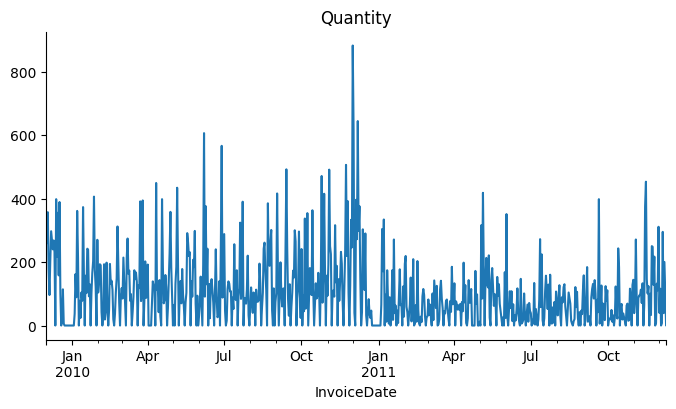

In [109]:
#plot quantity column
p1['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

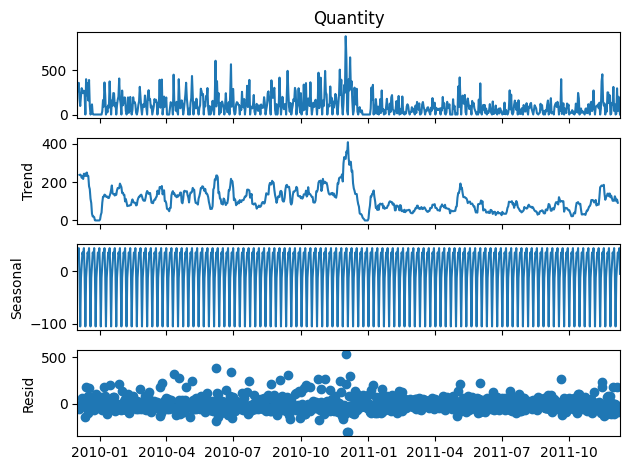

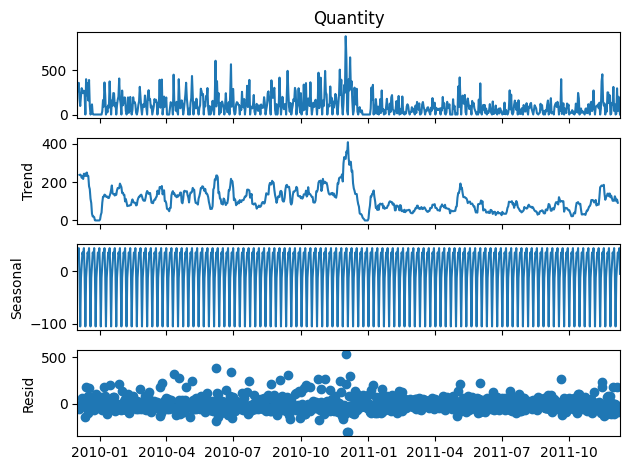

In [110]:
# lets check the trend and seasonality graph
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result_add = seasonal_decompose(p1['Quantity'], model="additive")

trend = decompose_result_add.trend
seasonal = decompose_result_add.seasonal
residual = decompose_result_add.resid

decompose_result_add.plot()


In [111]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))

    # Check whether the data is statioanry or non-stationary
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis. Reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against the null hypothesis which indicating data is non-stationary")


In [112]:
adf_test(p1['Quantity'])

ADF Statistics: -3.9870704890965523
p-value: 0.0014797479112414965
Strong evidence against the null hypothesis. Reject the null hypothesis. Data is stationary


With the help of ADfuller you can see that our data is already stationary so we don't need to do differencing for make it statiionary

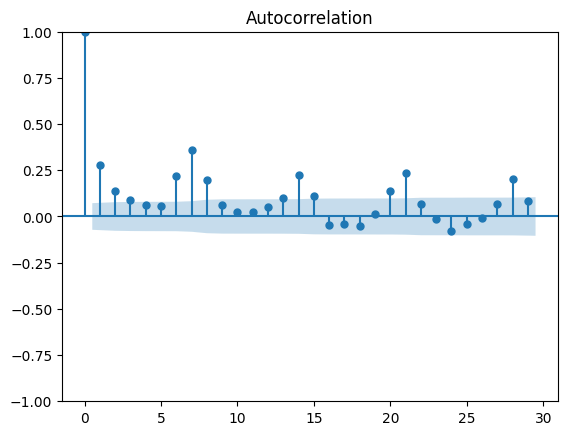

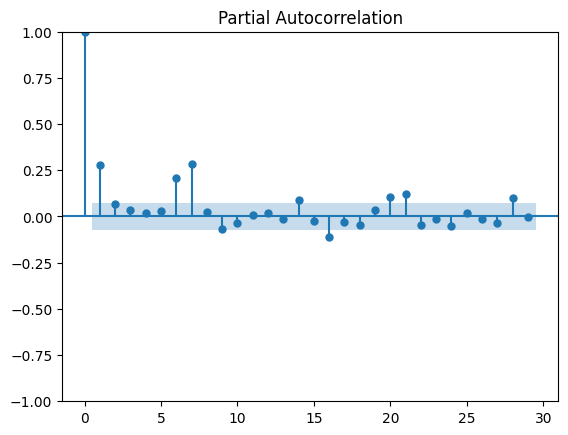

In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#AutoCorrelation and Partial Correlation Plots
acf12 = plot_acf(p1["Quantity"].dropna())
pacf12 = plot_pacf(p1["Quantity"].dropna())

**Modeling**

In [115]:
# split data into test and train
total_length = len(p1)
train_size = int(0.80 * total_length)

train_data = p1.iloc[:train_size]
test_data = p1.iloc[train_size:]

LSTM model

In [119]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [120]:
# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data['Quantity'].values.reshape(-1,1))

In [ ]:
train_scaled

In [123]:
# Prepare the data for LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 10
X_train, y_train = create_dataset(train_scaled, train_scaled, TIME_STEPS)

In [130]:
X_train.shape

(581, 10, 1)

In [140]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [142]:
# Fit the LSTM model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/100
17/17 [==============================] - 0s 21ms/step - loss: 0.0122 - val_loss: 0.0065
Epoch 2/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0117 - val_loss: 0.0063
Epoch 3/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0118 - val_loss: 0.0065
Epoch 4/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0122 - val_loss: 0.0070
Epoch 5/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0127 - val_loss: 0.0072
Epoch 6/100
17/17 [==============================] - 0s 22ms/step - loss: 0.0121 - val_loss: 0.0062
Epoch 7/100
17/17 [==============================] - 0s 22ms/step - loss: 0.0115 - val_loss: 0.0062
Epoch 8/100
17/17 [==============================] - 0s 23ms/step - loss: 0.0115 - val_loss: 0.0067
Epoch 9/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0115 - val_loss: 0.0068
Epoch 10/100
17/17 [==============================] - 0s 21ms/step - loss: 0.0115 - val_loss: 0.0068

In [143]:
# make prediction on testing data
test_scaled = scaler.transform(test_data['Quantity'].values.reshape(-1,1))
X_test, y_test = create_dataset(test_scaled, test_scaled, TIME_STEPS)

predictions = model.predict(X_test)

# Invert scaling for predictions and actual
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

5/5 [==============================] - 0s 5ms/step


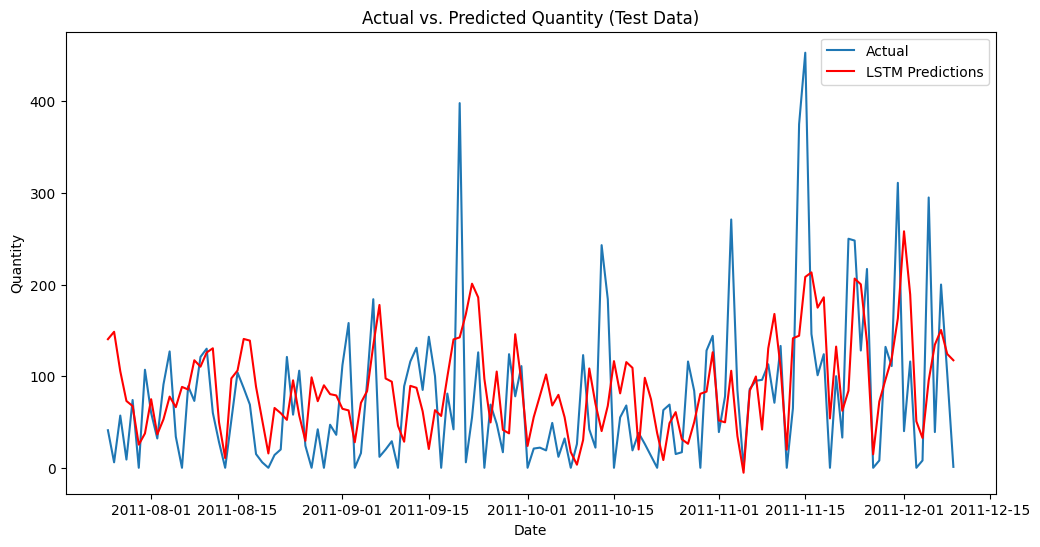

In [144]:
# Plot the actual vs. predicted values on the test data
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[TIME_STEPS:], actual, label='Actual')
plt.plot(test_data.index[TIME_STEPS:], predictions, color='red', label='LSTM Predictions')
plt.title('Actual vs. Predicted Quantity (Test Data)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()


ARIMA model

In [146]:
from statsmodels.tsa.arima.model import ARIMA

order = (6,1,1)
model = ARIMA(train_data['Quantity'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  591
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -3594.707
Date:                Mon, 18 Mar 2024   AIC                           7205.414
Time:                        01:46:41   BIC                           7240.455
Sample:                    12-01-2009   HQIC                          7219.065
                         - 07-14-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6381      0.112     -5.688      0.000      -0.858      -0.418
ar.L2         -0.5601      0.074     -7.566      0.000      -0.705      -0.415
ar.L3         -0.5123      0.071     -7.236      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


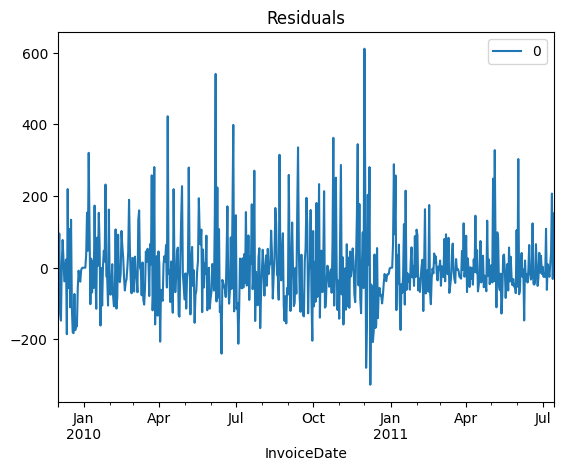

In [147]:
# Plot the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals')
plt.show()


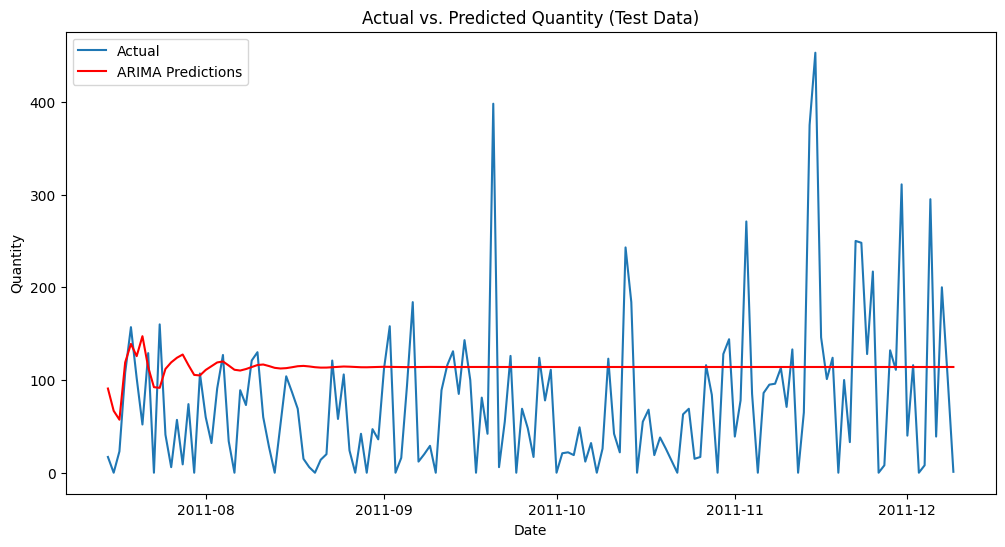

In [148]:
# Plot the actual vs. predicted values on the test data
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Quantity'], label='Actual')
plt.plot(test_data.index, model_fit.forecast(steps=len(test_data)), color='red', label='ARIMA Predictions')
plt.title('Actual vs. Predicted Quantity (Test Data)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()